<a href="https://colab.research.google.com/github/donrj05/Project_PR/blob/main/PR_PROJECT_GROUP_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#run the cells in order as no cell is connected to another
#created by group14 of pr team
#first svm gaussian classifier,then k nearest neighbours and then PCA done in svm gaussian classifier
#it would be better if it is run in jupyter notebook or google collab
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors              
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn import datasets

from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA# Make an instance of the Model


import operator


In [ ]:
x1=np.loadtxt('http://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra',delimiter=",")#training data
x2=np.loadtxt('http://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tes',delimiter=",")#testing data
print(len(x1))
print(len(x2))

3823
1797


In [ ]:
#separating labels from data 
#in optdigits.tra,65th column is class label 
count=0
x_train=[]
y_train=[]
for i in x1:
    x=[]
    for j in i:
        count=count+1
        if count<65:
            x.append(j)
        elif count==65:
            y_train.append(j)
            x_train.append(x)
            count=0
print(len(y_train))

3823


In [ ]:
#in optdigits.tes 65th column is label
count=0
x_test=[]
y_test=[]
for i in x2:
    x=[]
    for j in i:
        count=count+1
        if count<65:
            x.append(j)
        elif count==65:
            y_test.append(j)
            x_test.append(x)
            count=0
print(len(x_test))

1797


In [ ]:
#findout optimal parameters for gausian SVM
param_grid=[
    {'C' : [0.5,1,10,100,1000],
     'gamma':['scale', 1, 0.1, 0.01, 0.001, 0.001],
     'kernel':['rbf'] },
]
optimal_params= GridSearchCV(
    SVC(),
    param_grid,
    cv=5,
    scoring='accuracy',

)
optimal_params.fit(x_train, y_train)
print(optimal_params.best_params_)

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}


In [ ]:
#create a gaussian classifier
clf=svm.SVC(gamma=0.001,C=10)
clf.fit(x_train,y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

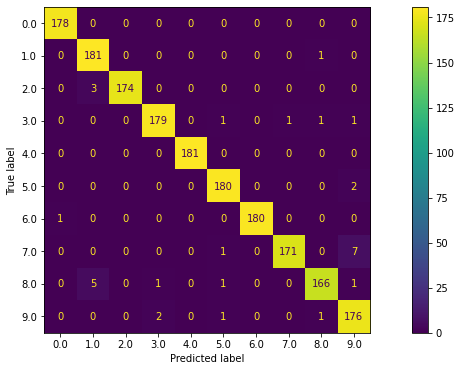

In [ ]:
#plotting confusion matrix
plot_confusion_matrix(clf,
                      x_test,
                      y_test,
                      values_format='d',
                     )

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
8


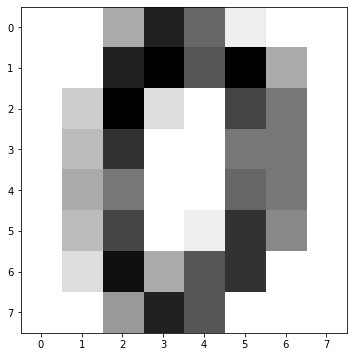

In [ ]:
#showing related data of 1stimage 
z=x_test[0]
x11=np.array(z)
x1_new=x11.reshape(8,8)
print(x1_new)
print(len(x1_new))
plt.imshow(x1_new,cmap=plt.cm.gray_r,interpolation="nearest")

In [ ]:
#predictions of testing data
y_prediction=[]
for q in x_test:
    x=clf.predict([q])
    y_prediction.append(x[0])
#print(y_prediction[0])
#print(y_test[0])
print('accuracy percentage in gaussian SVM:',100*accuracy_score(y_test, y_prediction,normalize=True))
print('no of correct predictions in gaussian SVM:',accuracy_score(y_test, y_prediction,normalize=False))

accuracy percentage in gaussian SVM: 98.27490261547022
no of correct predictions in gaussian SVM: 1766


1759

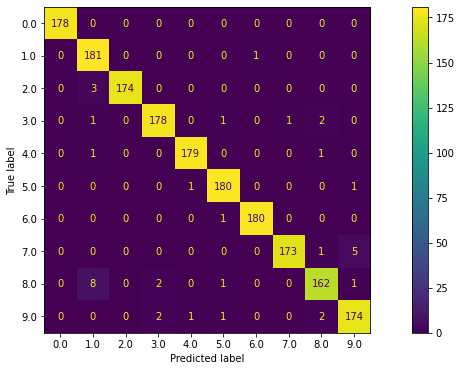

In [ ]:
#creating a k-nearest neighbour classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
#Predict the response for test dataset
y_pred = knn.predict(x_test)
#plot confusion matrix
plot_confusion_matrix(knn,
                      x_test,
                      y_test,
                      values_format='d',
                     )
accuracy_score(y_test, y_pred,normalize=False)

In [ ]:
#checking the accuracies for different values of k
for i in range(1,15):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train, y_train)
  y_pred = knn.predict(x_test)
  c=accuracy_score(y_test, y_pred,normalize=True)
  d=accuracy_score(y_test,  y_pred,normalize=False)
  print(' value of k:',i,'accuracy:',c,'no of correct predictions:',d)

 value of k: 1 accuracy: 0.9799666110183639 no of correct predictions: 1761
 value of k: 2 accuracy: 0.9738452977184195 no of correct predictions: 1750
 value of k: 3 accuracy: 0.9782971619365609 no of correct predictions: 1758
 value of k: 4 accuracy: 0.9766277128547579 no of correct predictions: 1755
 value of k: 5 accuracy: 0.9788536449638287 no of correct predictions: 1759
 value of k: 6 accuracy: 0.9777406789092933 no of correct predictions: 1757
 value of k: 7 accuracy: 0.9766277128547579 no of correct predictions: 1755
 value of k: 8 accuracy: 0.9766277128547579 no of correct predictions: 1755
 value of k: 9 accuracy: 0.9771841958820257 no of correct predictions: 1756
 value of k: 10 accuracy: 0.9755147468002225 no of correct predictions: 1753
 value of k: 11 accuracy: 0.9794101279910963 no of correct predictions: 1760
 value of k: 12 accuracy: 0.9744017807456873 no of correct predictions: 1751
 value of k: 13 accuracy: 0.9738452977184195 no of correct predictions: 1750
 value o

In [ ]:
scaler = StandardScaler()# Fit on training set only.
x_train1=x_train.copy()
scaler.fit(x_train1)# Apply transform to both the training set and the test set.
train_img = scaler.transform(x_train1)
x_test1=x_test.copy()
test_img = scaler.transform(x_test1)

In [ ]:
pca = PCA()

In [ ]:
pca.fit(train_img)#training data only

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

In [ ]:
print(len(pca.components_[0]))
print(len(pca.explained_variance_ratio_))
xx=pca.explained_variance_ratio_.copy()
print(xx)

64
64
[1.16390519e-01 1.05157939e-01 7.62637875e-02 5.71196171e-02
 4.96873006e-02 4.64810382e-02 3.85458353e-02 3.37905063e-02
 2.85103132e-02 2.63091579e-02 2.50359564e-02 2.40869073e-02
 2.27882687e-02 2.09357664e-02 1.95580591e-02 1.89091193e-02
 1.84338560e-02 1.80092864e-02 1.62215674e-02 1.56513412e-02
 1.42523410e-02 1.37833414e-02 1.28868420e-02 1.12881932e-02
 1.06152420e-02 1.01262128e-02 9.72703327e-03 9.29472138e-03
 8.63324788e-03 8.24354471e-03 7.87725165e-03 7.12658067e-03
 6.95497230e-03 6.29398177e-03 6.07751848e-03 5.92961085e-03
 5.33856788e-03 4.88499246e-03 4.51338338e-03 4.46157597e-03
 4.35509690e-03 4.01866465e-03 3.85701372e-03 3.45350213e-03
 3.32455556e-03 3.09778534e-03 3.07226655e-03 2.77881179e-03
 2.66685310e-03 2.56958541e-03 2.42814868e-03 2.35894807e-03
 2.18329701e-03 2.07731606e-03 1.92919098e-03 1.80669826e-03
 1.63250282e-03 1.53692560e-03 1.42054743e-03 1.23765977e-03
 1.06561754e-03 9.33715516e-04 3.74917821e-33 5.27544613e-34]


In [ ]:
f=[]
w={}
for i in range(0,64):
    s='f'+str(i+1)
    f.append(s)
    w[s]=xx[i]
print(w)
#D= dict( sorted(w.items(), key=operator.itemgetter(1),reverse=True))
#print(D)

{'f1': 0.1163905188139957, 'f2': 0.10515793883047829, 'f3': 0.07626378753897901, 'f4': 0.05711961707785867, 'f5': 0.04968730061334485, 'f6': 0.046481038185388554, 'f7': 0.03854583533914422, 'f8': 0.03379050625802916, 'f9': 0.028510313238338407, 'f10': 0.0263091579323566, 'f11': 0.025035956437341304, 'f12': 0.02408690732076963, 'f13': 0.02278826868338936, 'f14': 0.02093576642721369, 'f15': 0.01955805911044582, 'f16': 0.018909119330281037, 'f17': 0.01843385595987383, 'f18': 0.018009286443747323, 'f19': 0.016221567354742842, 'f20': 0.015651341158281297, 'f21': 0.014252340989193868, 'f22': 0.013783341372902316, 'f23': 0.012886842020226438, 'f24': 0.011288193248378089, 'f25': 0.010615242006703064, 'f26': 0.010126212789588586, 'f27': 0.009727033265789225, 'f28': 0.009294721382252425, 'f29': 0.008633247877847883, 'f30': 0.00824354471156443, 'f31': 0.007877251645228232, 'f32': 0.0071265806686064736, 'f33': 0.006954972304800264, 'f34': 0.006293981768165195, 'f35': 0.006077518479954783, 'f36': 0

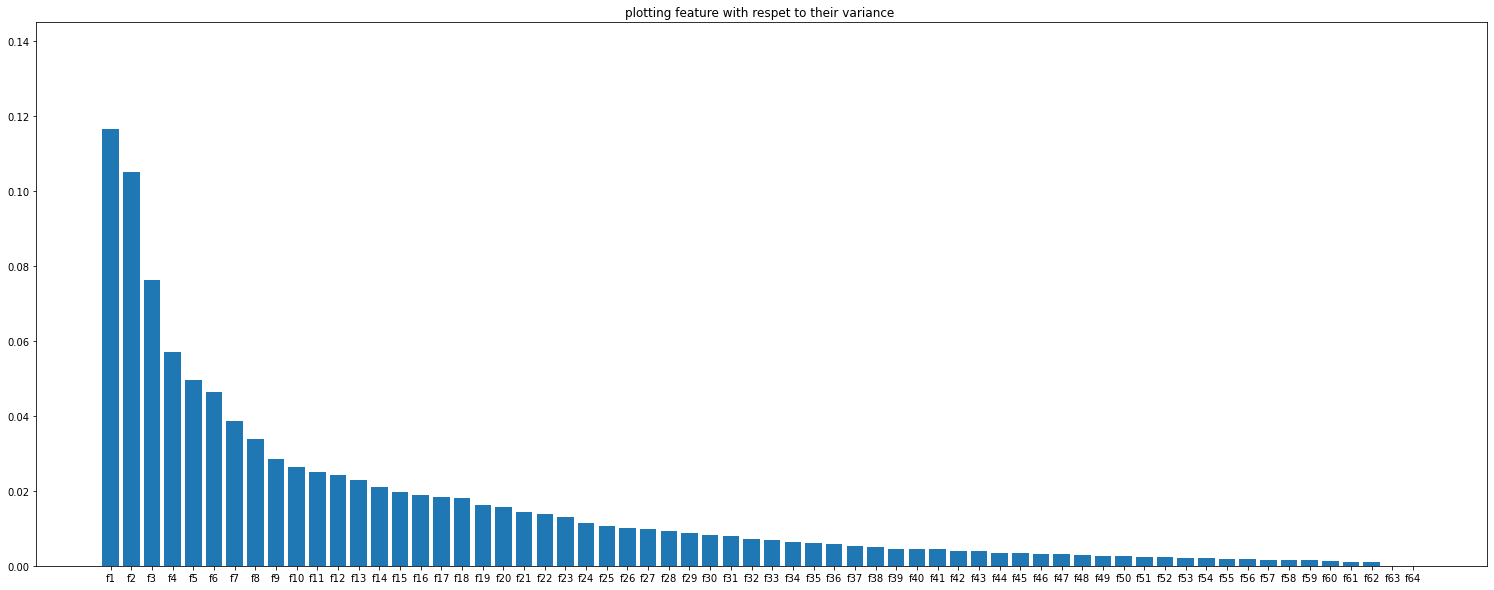

In [ ]:
#plt.rcParams['figure.figsize']=(26,10)
plt.bar(range(len(w)), list(w.values()), align='center')
plt.xticks(range(len(w)), list(w.keys()))
plt.ylim((0,0.145))
plt.title('plotting feature with respet to their variance ')
plt.show()

In [ ]:
clf1=svm.SVC(gamma=0.001,C=10)
clf1.fit(train_img,y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#predictions on testing data
y_img_prediction=[]
for q in test_img:
    x=clf1.predict([q])
    y_img_prediction.append(x[0])

#print(len(y_img_prediction))
#print(y_img_prediction[0])
print('accuracy:',100*accuracy_score(y_test, y_img_prediction,normalize=True))
print('no of correct predictions:',accuracy_score(y_test, y_img_prediction,normalize=False))

accuracy: 96.661101836394
no of correct predictions: 1737


no of correct predictions: 1737


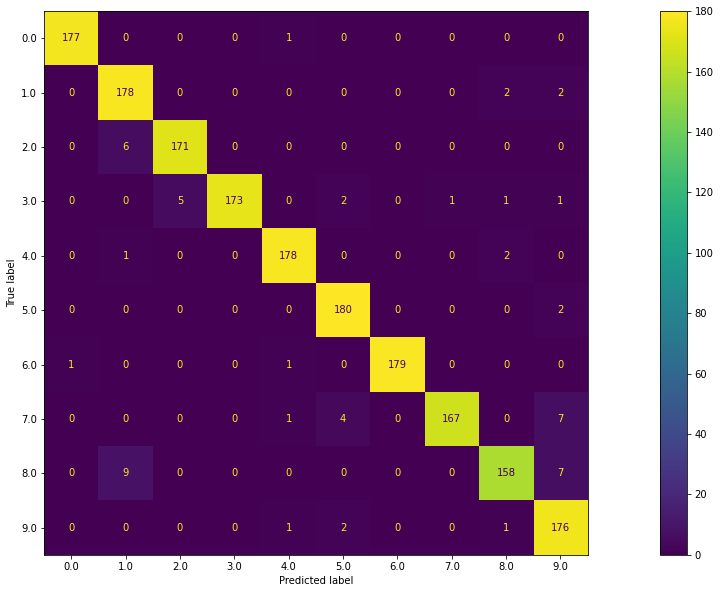

In [ ]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf1,
                      test_img,
                      y_test,
                      values_format='d',
                     )
print('no of correct predictions:',accuracy_score(y_test, y_img_prediction,normalize=False))